<a href="https://colab.research.google.com/github/elizavetakotelnikova/ML_projects_course/blob/main/DL_School_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting users's future activity

This contest was based on the data of telecom company, so it could be predicted if the user will stay or not.

*train.csv* - data for training

*test.csv*- data for testing

*my_submission.csv* - data with the predicted probabilities


Used metrics - **ROC-AUC**, as it works even if the classes are highly imbalanced, good for competitions

# First part. Data-preprocessing and exploring

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 27.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 17.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 32.9MB/s]


In [3]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [4]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [6]:
data["TotalSpent"].unique()

array(['1026.35', '1872.2', '75.9', ..., '55.05', '2215.25', '1375.6'],
      dtype=object)

In [7]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'],errors='coerce')

In [8]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [9]:
data = data.fillna(data["TotalSpent"].mean())

Conclusion: nine NaNs were replaced with a column's mean

In [10]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [11]:
data[num_cols].head()

,ClientPeriod,MonthlySpending,TotalSpent
0,55,19.50,1026.35
1,72,25.85,1872.20
2,1,75.90,75.90
3,32,79.30,2570.00
4,60,115.25,6758.45


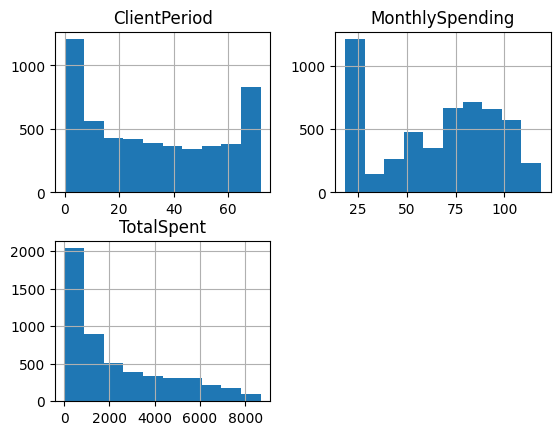

In [12]:
data[num_cols].hist()
plt.show()

<Axes: >

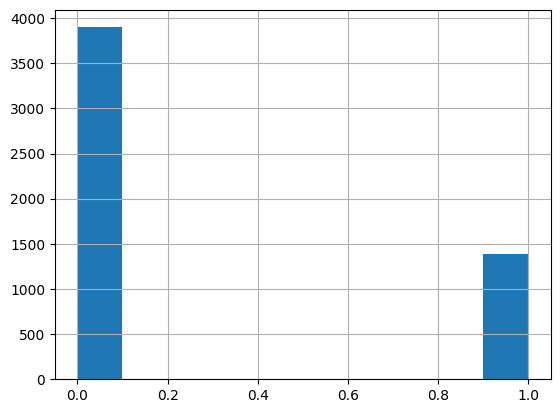

In [13]:
data[target_col].hist()

**!!classes are highly imbalanced!!**



1     457
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: ClientPeriod, Length: 73, dtype: int64
20.05    46
19.65    35
19.95    34
20.00    33
19.70    32
         ..
87.30     1
68.90     1
67.20     1
86.30     1
98.20     1
Name: MonthlySpending, Length: 1468, dtype: int64
2291.390461    9
20.200000      9
19.750000      8
20.050000      6
19.650000      6
              ..
41.850000      1
4326.250000    1
950.200000     1
4264.000000    1
1375.600000    1
Name: TotalSpent, Length: 4978, dtype: int64
Male      2655
Female    2627
Name: Sex, dtype: int64
0    4440
1     842
Name: IsSeniorCitizen, dtype: int64
No     2705
Yes    2577
Name: HasPartner, dtype: int64
No     3676
Yes    1606
Name: HasChild, dtype: int64
Yes    4761
No      521
Name: HasPhoneService, dtype: int64
No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64
Fiber optic    2341
DSL           

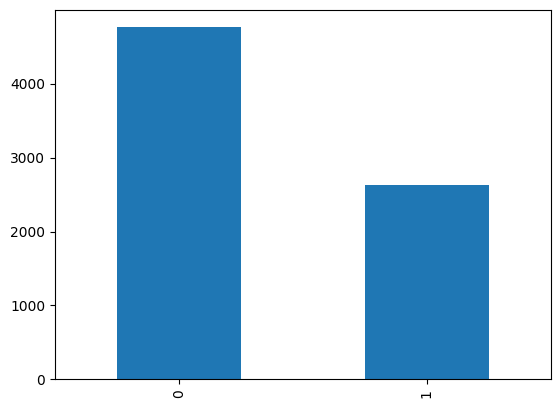

In [14]:
for column in data.columns:
  print(data[column].value_counts())
  data[column].value_counts().plot(kind='bar')

# Second part - predicting using a logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [16]:
#one-hot-encoding using get_dummies()
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X = pd.get_dummies(X);

In [17]:
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)

In [19]:
#normalizing values using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.95398674, -0.67215144, -0.83278965, ..., -0.50841298,
         1.41787259, -0.55017323],
       [ 0.17804907,  0.16102168,  0.08997068, ..., -0.50841298,
        -0.70528199,  1.81760934],
       [ 0.70363713,  1.34983785,  1.295859  , ...,  1.96690495,
        -0.70528199, -0.55017323],
       ...,
       [ 1.59309384,  0.51165567,  1.46260963, ..., -0.50841298,
        -0.70528199, -0.55017323],
       [ 1.59309384,  1.10606375,  2.06881833, ..., -0.50841298,
        -0.70528199, -0.55017323],
       [-1.03484644, -1.19309336, -0.9265531 , ..., -0.50841298,
        -0.70528199,  1.81760934]])

In [20]:
clf = LogisticRegressionCV(scoring='roc_auc', refit=True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegressionCV(scoring='roc_auc')

In [21]:
X_train

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
607,51,44.45,2181.55,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,1,0,0
3800,41,50.05,2029.05,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1712,61,59.80,3641.50,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
2199,20,64.40,1398.60,0,0,1,1,0,1,0,...,1,1,0,0,1,0,0,1,0,0
955,10,86.45,830.85,0,1,0,1,0,1,0,...,1,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,14,91.65,1301.00,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3772,19,73.20,1441.10,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
5191,50,20.55,1070.25,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
5226,8,84.50,662.65,0,0,1,1,0,1,0,...,1,1,0,0,1,0,1,0,0,0


In [22]:
clf = LogisticRegression()
grid_clf = GridSearchCV(estimator=clf, param_grid={"C": [0.001, 0.01, 0.1, 1, 10]}, cv=5, scoring='roc_auc')
grid_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}, scoring='roc_auc')

In [23]:
grid_clf.best_params_

{'C': 0.1}

In [24]:
grid_clf.best_score_

0.8529801140314281

In [25]:
y_grid_pred = grid_clf.predict(X_test);

In [26]:
#best roc_auc_score with a logistic regression model
roc_auc_score = metrics.roc_auc_score(y_test, y_grid_pred)
roc_auc_score

0.7113379792797007

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

The best score can be achieved with C = 0.1: in that case
roc_auc_score is 0.7113

# Training CatBoostClassifier and tuning its parametrs

In [27]:
#splitting the data into train and valid folds
data_train_catboost = pd.concat((data[num_cols], data[cat_cols]), axis=1)
x_train_catboost, x_valid_catboost, y_train_catboost, y_valid_catboost = train_test_split(data_train_catboost, data[target_col], test_size=0.2, random_state=19)

In [28]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.8 MB/s eta 0:00:00


In [29]:
from catboost import CatBoostClassifier
cat_boost_clf = CatBoostClassifier(eval_metric='AUC')
cat_boost_clf.fit(x_train_catboost, y_train_catboost, cat_features=cat_cols, eval_set=(x_valid_catboost, y_valid_catboost))

Learning rate set to 0.045236
0:	test: 0.8016290	best: 0.8016290 (0)	total: 64.9ms	remaining: 1m 4s
1:	test: 0.8070937	best: 0.8070937 (1)	total: 80.2ms	remaining: 40s
2:	test: 0.8120505	best: 0.8120505 (2)	total: 94.6ms	remaining: 31.4s
3:	test: 0.8239458	best: 0.8239458 (3)	total: 110ms	remaining: 27.4s
4:	test: 0.8197713	best: 0.8239458 (3)	total: 119ms	remaining: 23.7s
5:	test: 0.8250252	best: 0.8250252 (5)	total: 135ms	remaining: 22.3s
6:	test: 0.8254809	best: 0.8254809 (6)	total: 149ms	remaining: 21.1s
7:	test: 0.8249458	best: 0.8254809 (6)	total: 163ms	remaining: 20.3s
8:	test: 0.8260183	best: 0.8260183 (8)	total: 179ms	remaining: 19.7s
9:	test: 0.8274015	best: 0.8274015 (9)	total: 192ms	remaining: 19s
10:	test: 0.8271793	best: 0.8274015 (9)	total: 208ms	remaining: 18.7s
11:	test: 0.8280206	best: 0.8280206 (11)	total: 221ms	remaining: 18.2s
12:	test: 0.8289298	best: 0.8289298 (12)	total: 236ms	remaining: 17.9s
13:	test: 0.8288913	best: 0.8289298 (12)	total: 250ms	remaining: 17.6

In [30]:
#exploring best cat boost parametrs
cat_boost_clf.best_score_

{'learn': {'Logloss': 0.23595940499890847},
 'validation': {'Logloss': 0.42121148083237714, 'AUC': 0.8434600419036217}}

In [31]:
grid = {'depth' : np.arange(2, 10, 2),
        'iterations': [50, 100, 250, 400, 500, 700, 900, 1000],
        'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.09]}
model = CatBoostClassifier(eval_metric='AUC')
result = RandomizedSearchCV(estimator=model, param_distributions=grid, cv=3, n_jobs=-1)
result.fit(x_train_catboost, y_train_catboost, cat_features=cat_cols)

0:	total: 10.2ms	remaining: 2.54s
1:	total: 21ms	remaining: 2.6s
2:	total: 30.5ms	remaining: 2.51s
3:	total: 38.9ms	remaining: 2.39s
4:	total: 45.8ms	remaining: 2.25s
5:	total: 54.6ms	remaining: 2.22s
6:	total: 64ms	remaining: 2.22s
7:	total: 72.8ms	remaining: 2.2s
8:	total: 81.3ms	remaining: 2.18s
9:	total: 90ms	remaining: 2.16s
10:	total: 98.3ms	remaining: 2.14s
11:	total: 107ms	remaining: 2.12s
12:	total: 116ms	remaining: 2.11s
13:	total: 124ms	remaining: 2.09s
14:	total: 133ms	remaining: 2.08s
15:	total: 142ms	remaining: 2.08s
16:	total: 152ms	remaining: 2.08s
17:	total: 157ms	remaining: 2.02s
18:	total: 166ms	remaining: 2.01s
19:	total: 173ms	remaining: 1.99s
20:	total: 180ms	remaining: 1.96s
21:	total: 187ms	remaining: 1.94s
22:	total: 196ms	remaining: 1.93s
23:	total: 204ms	remaining: 1.92s
24:	total: 219ms	remaining: 1.97s
25:	total: 227ms	remaining: 1.96s
26:	total: 235ms	remaining: 1.94s
27:	total: 243ms	remaining: 1.93s
28:	total: 252ms	remaining: 1.92s
29:	total: 257ms	rema

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x782ba75a6a10>,
                   n_jobs=-1,
                   param_distributions={'depth': array([2, 4, 6, 8]),
                                        'iterations': [50, 100, 250, 400, 500,
                                                       700, 900, 1000],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.07, 0.09]})

In [32]:
result.best_params_

{'learning_rate': 0.03, 'iterations': 250, 'depth': 4}

In [33]:
model_best = result.best_estimator_
model_best.fit(x_train_catboost, y_train_catboost, cat_features=cat_cols, eval_set=(x_valid_catboost, y_valid_catboost))

0:	test: 0.7472087	best: 0.7472087 (0)	total: 10.3ms	remaining: 2.58s
1:	test: 0.8093975	best: 0.8093975 (1)	total: 21.4ms	remaining: 2.65s
2:	test: 0.8131525	best: 0.8131525 (2)	total: 34.9ms	remaining: 2.87s
3:	test: 0.8197147	best: 0.8197147 (3)	total: 44.3ms	remaining: 2.72s
4:	test: 0.8254537	best: 0.8254537 (4)	total: 51.6ms	remaining: 2.53s
5:	test: 0.8253744	best: 0.8254537 (4)	total: 61.4ms	remaining: 2.5s
6:	test: 0.8256057	best: 0.8256057 (6)	total: 71.4ms	remaining: 2.48s
7:	test: 0.8258120	best: 0.8258120 (7)	total: 80.8ms	remaining: 2.44s
8:	test: 0.8251453	best: 0.8258120 (7)	total: 90.1ms	remaining: 2.41s
9:	test: 0.8281679	best: 0.8281679 (9)	total: 99.3ms	remaining: 2.38s
10:	test: 0.8264650	best: 0.8281679 (9)	total: 108ms	remaining: 2.35s
11:	test: 0.8274832	best: 0.8281679 (9)	total: 118ms	remaining: 2.34s
12:	test: 0.8291362	best: 0.8291362 (12)	total: 128ms	remaining: 2.33s
13:	test: 0.8300341	best: 0.8300341 (13)	total: 137ms	remaining: 2.3s
14:	test: 0.8314264	

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

In [34]:
X_test_new = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
X_test_new['TotalSpent']= pd.to_numeric(X_test_new['TotalSpent'],errors='coerce')
X_test_new = X_test_new.fillna(data["TotalSpent"].mean())

# Predicting target values

In [35]:
best_model = result

In [36]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('my_submission.csv', index=False)